**Find path of the comet in the image**

(source: https://www.theguardian.com/science/2020/dec/14/british-engineers-to-start-work-on-comet-chaser-probe)

1. **Extract the features from the image:** Given below is some code for extracting the pixels which lie on the path of the comet. We do this using image gradients and then thresholding the gradients using the Canny edge detector.

2. **Fit the polynomial:** Once we are satisfied with the features we extracted from the image, we can fit a model to the points. We start with a prior about the path of comet -- we know it travels in parabolic path. Therefore, here we fit a two degree polynomial to the points. Feel free to also try fitting a higher/lower degree polynomial using Python's polyfit function.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
import urllib

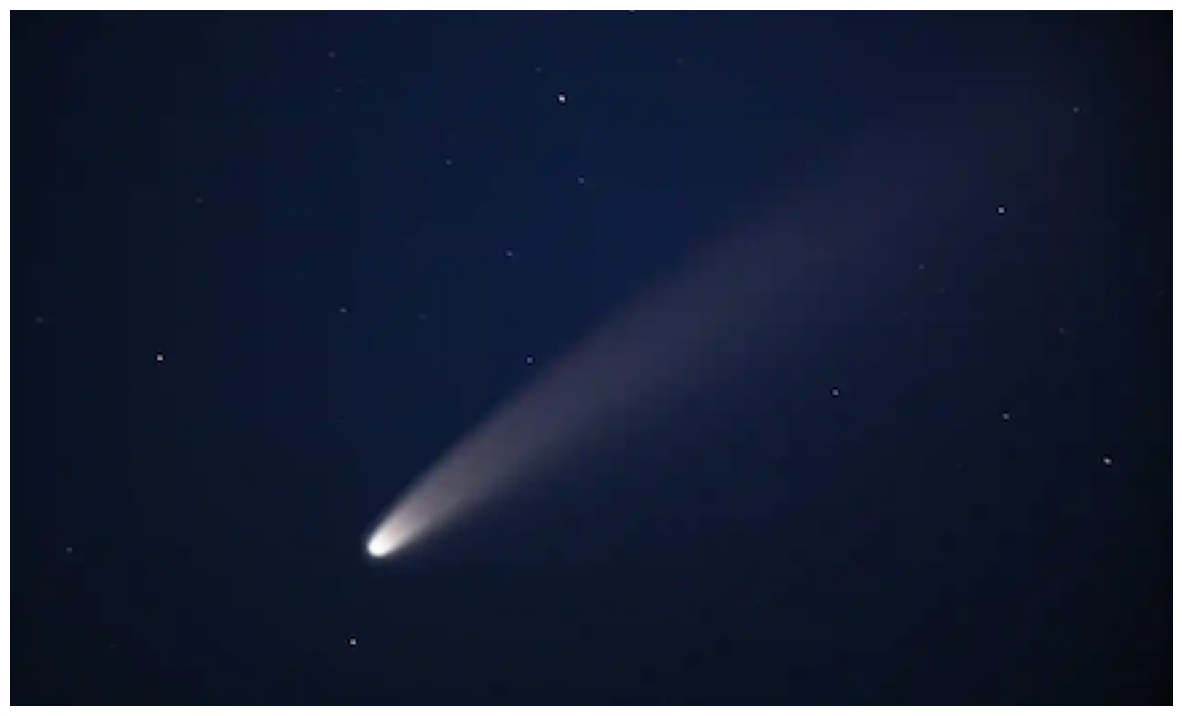

In [ ]:
# load the image
im = np.array(Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/W281/fileRepository/main/live_session/comet.png')))

# display the image
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(im)
plt.show()

def display_img_colorbar(img):
  # display the points
  fig, ax = plt.subplots(figsize=(15, 10))
  im_ax = plt.imshow(img, cmap='gray')
  # create an axes on the right side of ax. The width of cax will be 5%
  # of ax and the padding between cax and ax will be fixed at 0.05 inch.
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  plt.colorbar(im_ax, cax=cax)
  plt.show()

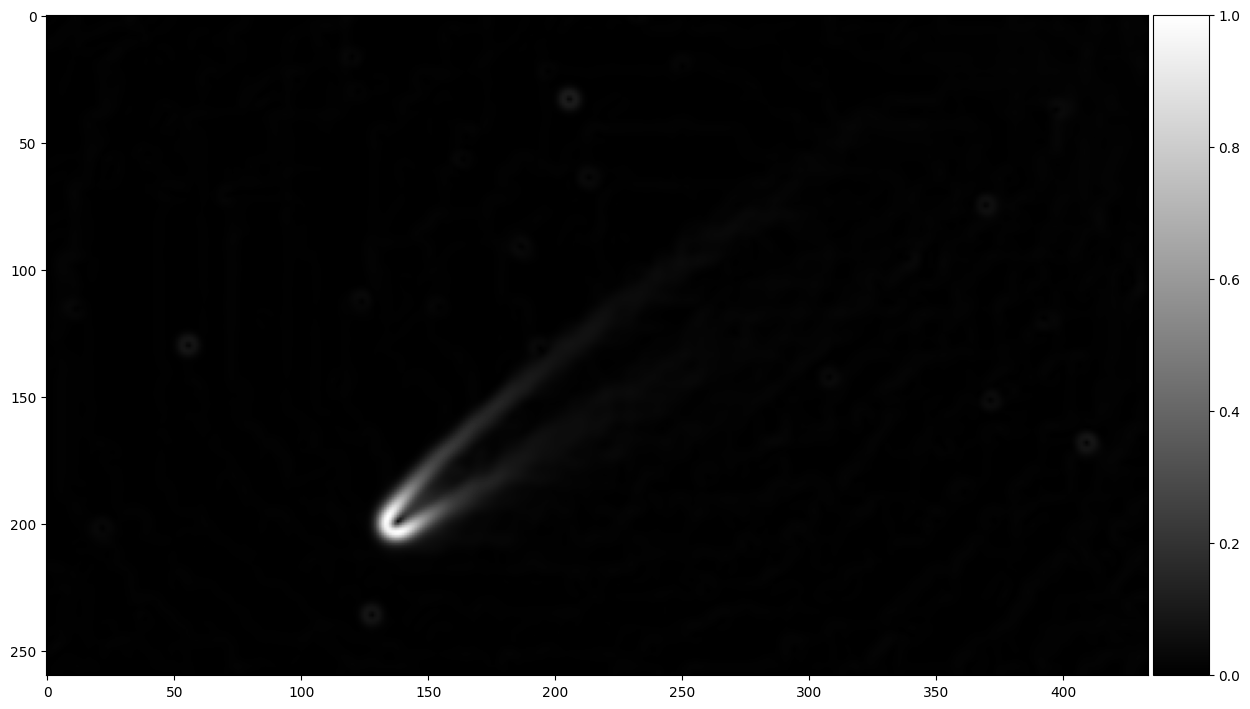

In [ ]:
# extract the features from the image

# convert to grayscale
if np.max(im)>1:
  im = im.astype(np.float32)/255.0
im_gray = np.mean(im, axis=2)

# compute edges of the image
sobelx = cv2.Sobel(im_gray, cv2.CV_32F, 1, 0, ksize=21) # Find x and y gradients
sobely = cv2.Sobel(im_gray, cv2.CV_32F, 0, 1, ksize=21)
magnitude = np.sqrt(sobelx**2.0 + sobely**2.0)
magnitude = magnitude / np.max(magnitude) # normalize

display_img_colorbar(magnitude)

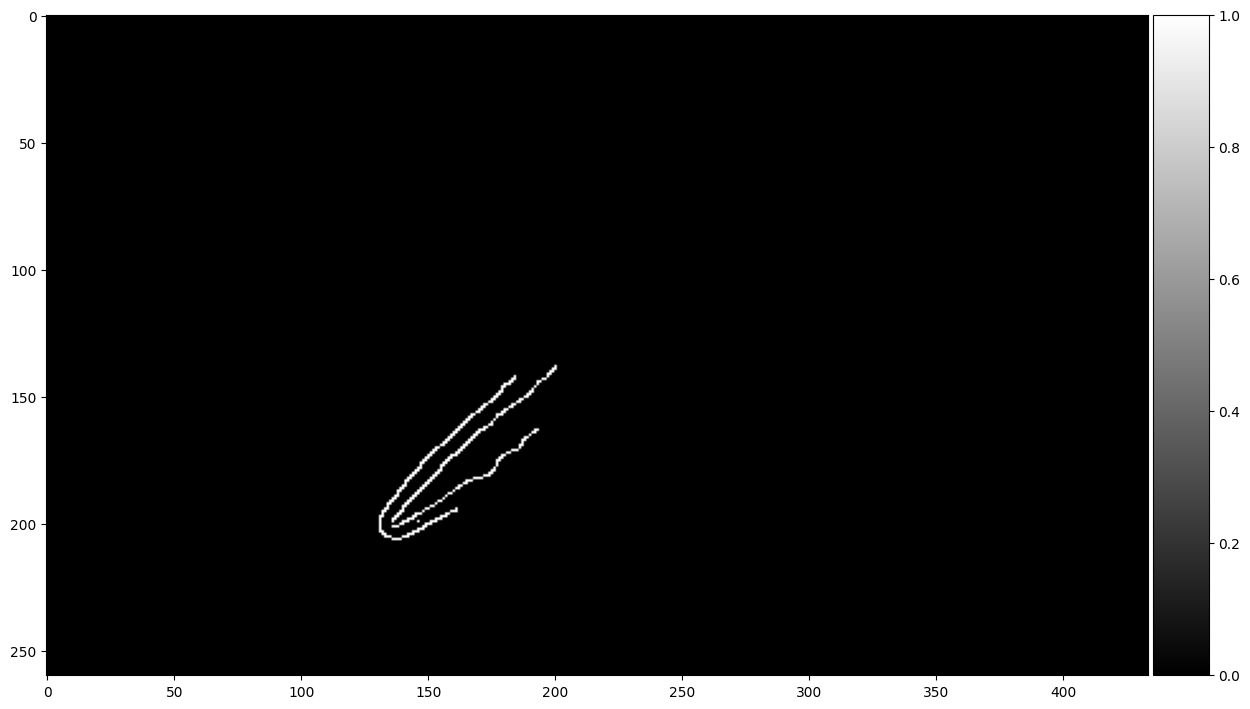

In [ ]:
# threshold the image and get the interesting points
im_threshold = cv2.Canny(image=(magnitude * 255).astype(np.uint8), threshold1=0, threshold2=100) # Canny Edge
im_threshold = im_threshold / np.max(im_threshold) # normalize

display_img_colorbar(im_threshold)

In [ ]:
# get the points on which we want to fit polynomial
yx = np.argwhere(im_threshold > 0)
x = yx[:, 1]
y = yx[:, 0]


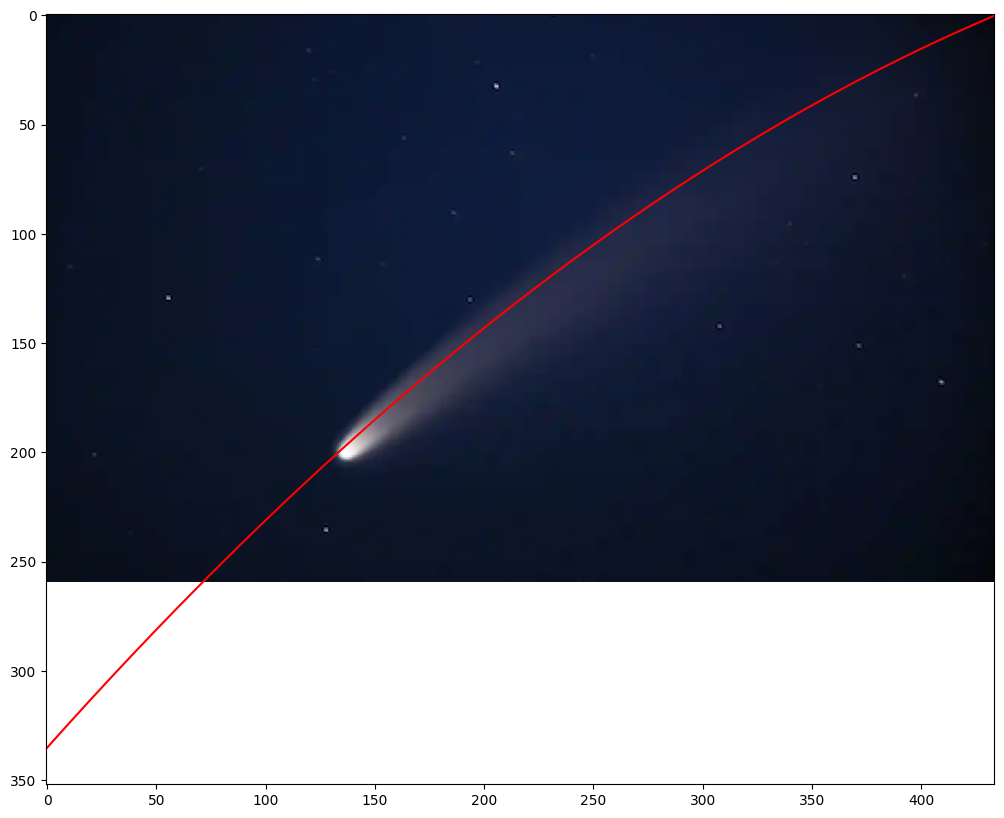

In [ ]:
# fit a second degree polynomial using the formula u = (X.T * X).inv * X.T * y

# model = ax2 + bx + c

# TODO: populate X
#X =
X = np.hstack([(x**2)[:, np.newaxis], x[:, np.newaxis], np.ones_like(x)[:, np.newaxis]])
# TODO: populate y_vec
#y_vec =
y_vec = y[:, np.newaxis]

# these are the unknowns
# TODO: get unknowns u
u = np.linalg.inv(X.T@X)@X.T@y

# plot the curve that we have fit
x_fit = np.arange(im.shape[1])
y_fit = u[0] * (x_fit**2) + u[1] * x_fit + u[2]
plt.figure(figsize=(15,10))
plt.imshow(im)
plt.plot(x_fit, y_fit, 'r-')
plt.show()


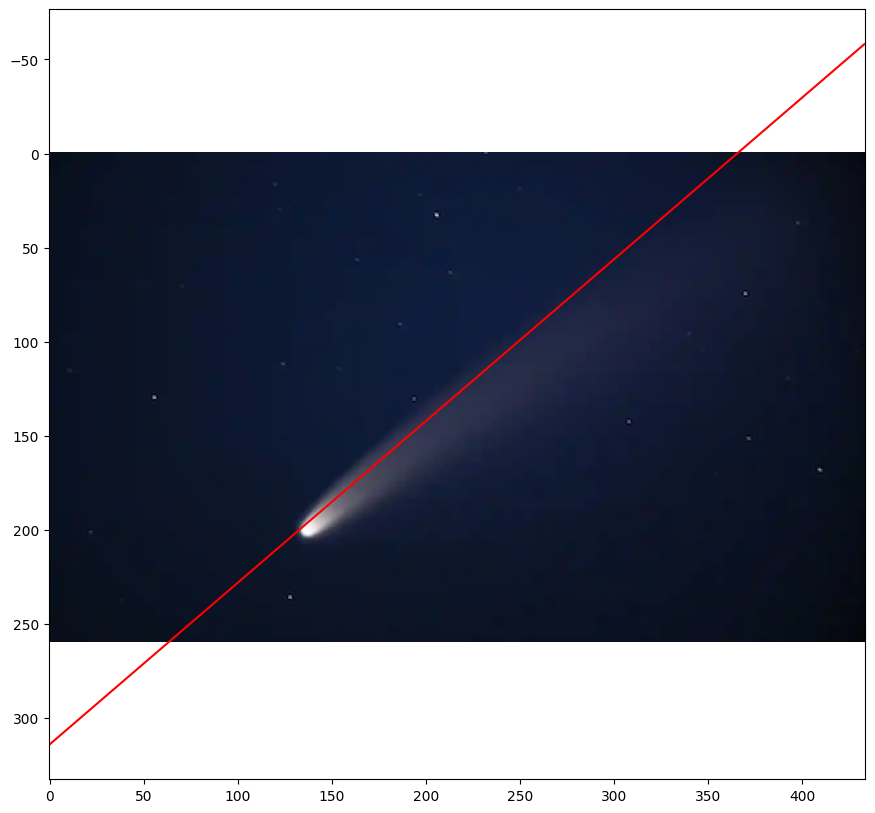

In [ ]:
# fit a first degree polynomial using the built-in python function
p = np.poly1d(np.polyfit(x, y, 1))

# display the image
plt.figure(figsize=(15,10))
plt.imshow(im)
plt.plot(np.arange(im.shape[1]), p(np.arange(im.shape[1])), 'r-')
plt.show()


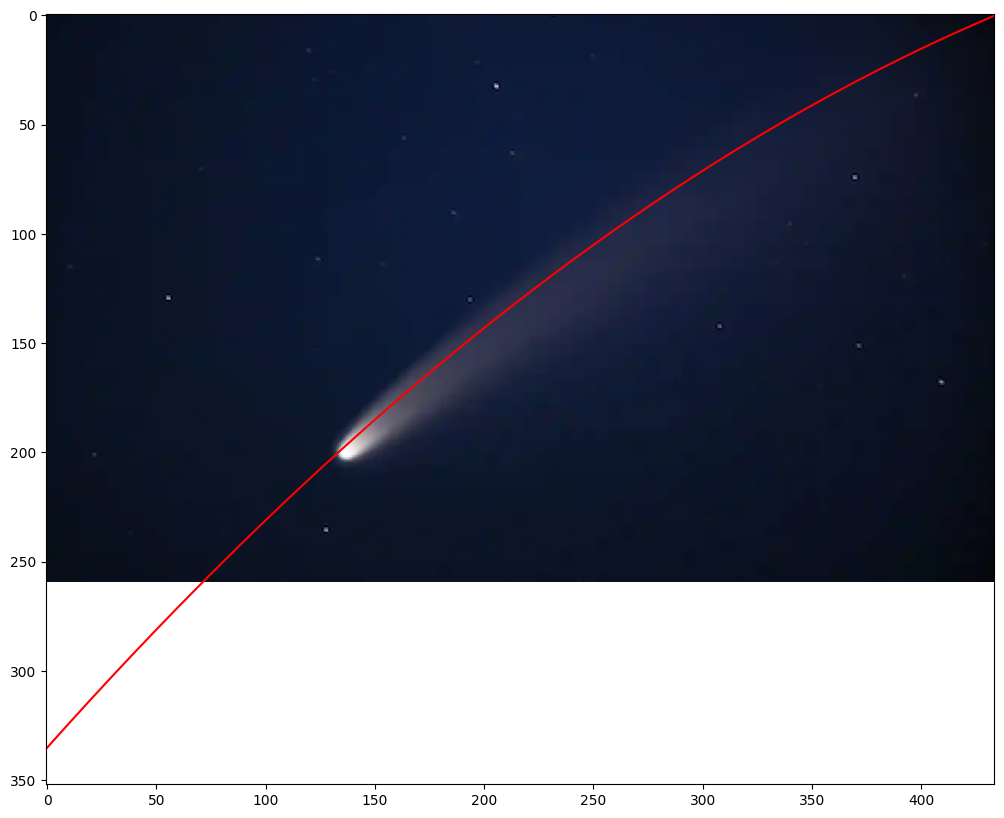

In [ ]:
# fit a second degree polynomial using the built-in python function
p = np.poly1d(np.polyfit(x, y, 2))

# display the image
plt.figure(figsize=(15,10))
plt.imshow(im)
plt.plot(np.arange(im.shape[1]), p(np.arange(im.shape[1])), 'r-')
plt.show()


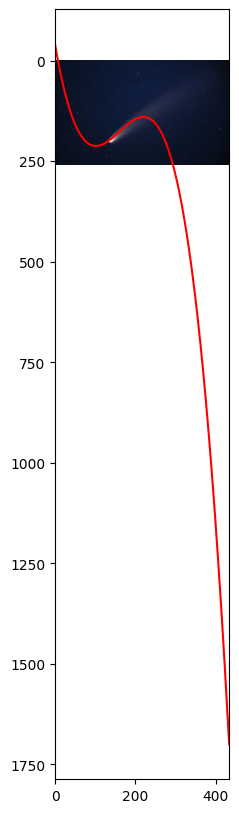

In [ ]:
# fit a third degree polynomial using the built-in python function
p = np.poly1d(np.polyfit(x, y, 3))

# display the image
plt.figure(figsize=(15, 10))
plt.imshow(im)
plt.plot(np.arange(im.shape[1]), p(np.arange(im.shape[1])), 'r-')
plt.show()
